In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [71]:
# Introduce bias in the 'Hired' column (biased towards males) simplicity I will use education level and years of experience as features
def decide_hiring(row):
    if row['Gender'] == 'Male':
        return np.random.choice(['Yes', 'No'], p=[0.9, 0.1])
    else:
        return np.random.choice(['Yes', 'No'], p=[0.2, 0.8])
education_levels = ['High School', 'Associate', 'Bachelor\'s', 'Master\'s', 'PhD']
def generate_imbalanced_data(num_samples=1000):
    # Set random seed for reproducibility
    np.random.seed(42)

    # Parameters
    num_samples = 1000
    
    # skills_pool = ['Python', 'SQL', 'Data Analysis', 'Machine Learning', 'AI']
    genders = ['Male', 'Female']

    # Generate synthetic data
    data = {
    'Applicant ID': range(1, num_samples + 1),
    # 'Education Level': np.random.choice(education_levels, num_samples, p=[0.1, 0.15, 0.4, 0.25, 0.1]),
    'Years of Experience': np.random.randint(1, 20, num_samples),
    # 'Skills': [', '.join(random.sample(skills_pool, k=np.random.randint(1, 4))) for _ in range(num_samples)],
    'Gender': np.random.choice(genders, num_samples, p=[0.6, 0.4])  # Slight bias in male population
    }
    # Create DataFrame
    df = pd.DataFrame(data)
    df['Hired'] = df.apply(decide_hiring, axis=1)
    return df


In [72]:
df=generate_imbalanced_data()
print(df.head())

   Applicant ID  Years of Experience  Gender Hired
0             1                    7    Male   Yes
1             2                   15  Female    No
2             3                   11    Male   Yes
3             4                    8    Male   Yes
4             5                    7    Male   Yes


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

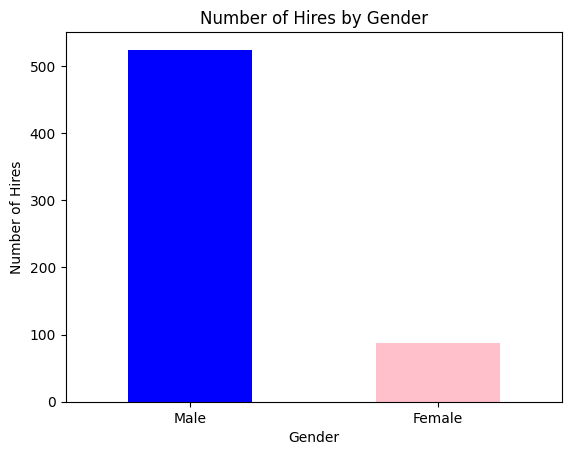

In [73]:

df_hired = df[df['Hired'] == 'Yes']
df_hired['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Hires by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Hires')
plt.xticks(rotation=0)

In [74]:
female_hiring_rate=df[df['Gender'] == 'Female']['Hired'].value_counts(normalize=True)['Yes']
male_hiring_rate=df[df['Gender'] == 'Male']['Hired'].value_counts(normalize=True)['Yes']
print ('Significantly higher male hiring rate may suggest bias in hiring process')
print(f'Male Hiring Rate: {male_hiring_rate:.3f}')
print(f'Female Hiring Rate: {female_hiring_rate:.3f}')


Significantly higher male hiring rate may suggest bias in hiring process
Male Hiring Rate: 0.911
Female Hiring Rate: 0.207


In [75]:
#Contingency Table
contingency_table = pd.crosstab(df['Gender'], df['Hired'],normalize='index')  
print(contingency_table)

Hired         No       Yes
Gender                    
Female  0.792941  0.207059
Male    0.088696  0.911304


In [76]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Hired'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'p-value: {p}')


Chi-Square Statistic: 507.45
p-value: 2.273377538297655e-112


In [77]:
# Average years of experience for hired males and females, their mean years of experience is similar even though the male hiring rate is higher
female_hired=df[(df['Gender']=='Female')&(df['Hired']=='Yes')]
male_hired=df[(df['Gender']=='Male')&(df['Hired']=='Yes')]
avg_experience_male = male_hired['Years of Experience'].mean()
avg_experience_female = female_hired['Years of Experience'].mean()

print(f'Average Experience for Hired Males: {avg_experience_male:.2f}')
print(f'Average Experience for Hired Females: {avg_experience_female:.2f}')


Average Experience for Hired Males: 9.67
Average Experience for Hired Females: 10.14


In [78]:
#Preprocessing data 
from sklearn.preprocessing import LabelEncoder, StandardScaler
le_gender = LabelEncoder()
df['Gender']=le_gender.fit_transform(df['Gender'])




KeyError: "None of [Index(['Education Level'], dtype='object')] are in the [columns]"